# **The goal here is to test the written loader, preprocessor and visualizer functions**

In [189]:
# from google.colab import drive
# drive.mount('/content/drive')

In [190]:
# !pip install lazypredict

In [191]:
# # navigate to root directory of current file in order to access other files relatively
# %cd /content/drive/MyDrive/Colab\ Notebooks/project-seraphim/server-side/modelling

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

import chardet

from utilities.loaders import \
    load_corpus, \
    get_chars, \
    load_lookup_array, \
    save_lookup_array, \
    load_meta_data, \
    save_meta_data, \
    construct_embedding_dict, \
    construct_embedding_matrix, \
    get_cat_cols, \
    get_top_models, \
    load_model, \
    save_model \

from utilities.preprocessors import \
    map_value_to_index, \
    remove_contractions, \
    rem_non_alpha_num, \
    capitalize, \
    filter_valid, \
    partition_corpus, \
    rem_stop_words, \
    stem_corpus_words, \
    lemmatize_corpus_words, \
    string_list_to_list, \
    flatten_series_of_lists, \
    sentences_to_avgs, \
    normalize_ratings, \
    normalize_rating_matrix, \
    normalize_train_cross, \
    encode_features

from utilities.visualizers import \
    plot_train_cross_features, \
    analyze, \
    view_words, \
    data_split_metric_values, \
    view_value_frequency, \
    multi_class_heatmap, \
    view_metric_values, \
    view_classified_labels, \
    view_label_freq, \
    disp_cat_feat, \
    describe_col, \
    visualize_graph, \
    plot_evolution, \
    view_clusters_3d, \
    ModelResults, \
    plot_all_features
    

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading different datasets as different test cases for loader, preprocessor, and visualizer functions

## California Housing (all continuous inputs & continuous outputs)
1. load
2. visualize raw
3. split
4. visualize split
5. engineer novel features
6. normalize
7. visualize normalization

In [193]:
cal_housing = pd.read_csv('./data/cal_housing.data', sep=',', header=None)

# preprocessing X and Y data
ch_X, ch_Y = cal_housing.loc[:, 0:7].to_numpy(), cal_housing.loc[:, 8].to_numpy()
ch_X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  3.2200e+02,
         1.2600e+02,  8.3252e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  2.4010e+03,
         1.1380e+03,  8.3014e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  4.9600e+02,
         1.7700e+02,  7.2574e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.0070e+03,
         4.3300e+02,  1.7000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  7.4100e+02,
         3.4900e+02,  1.8672e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  1.3870e+03,
         5.3000e+02,  2.3886e+00]])

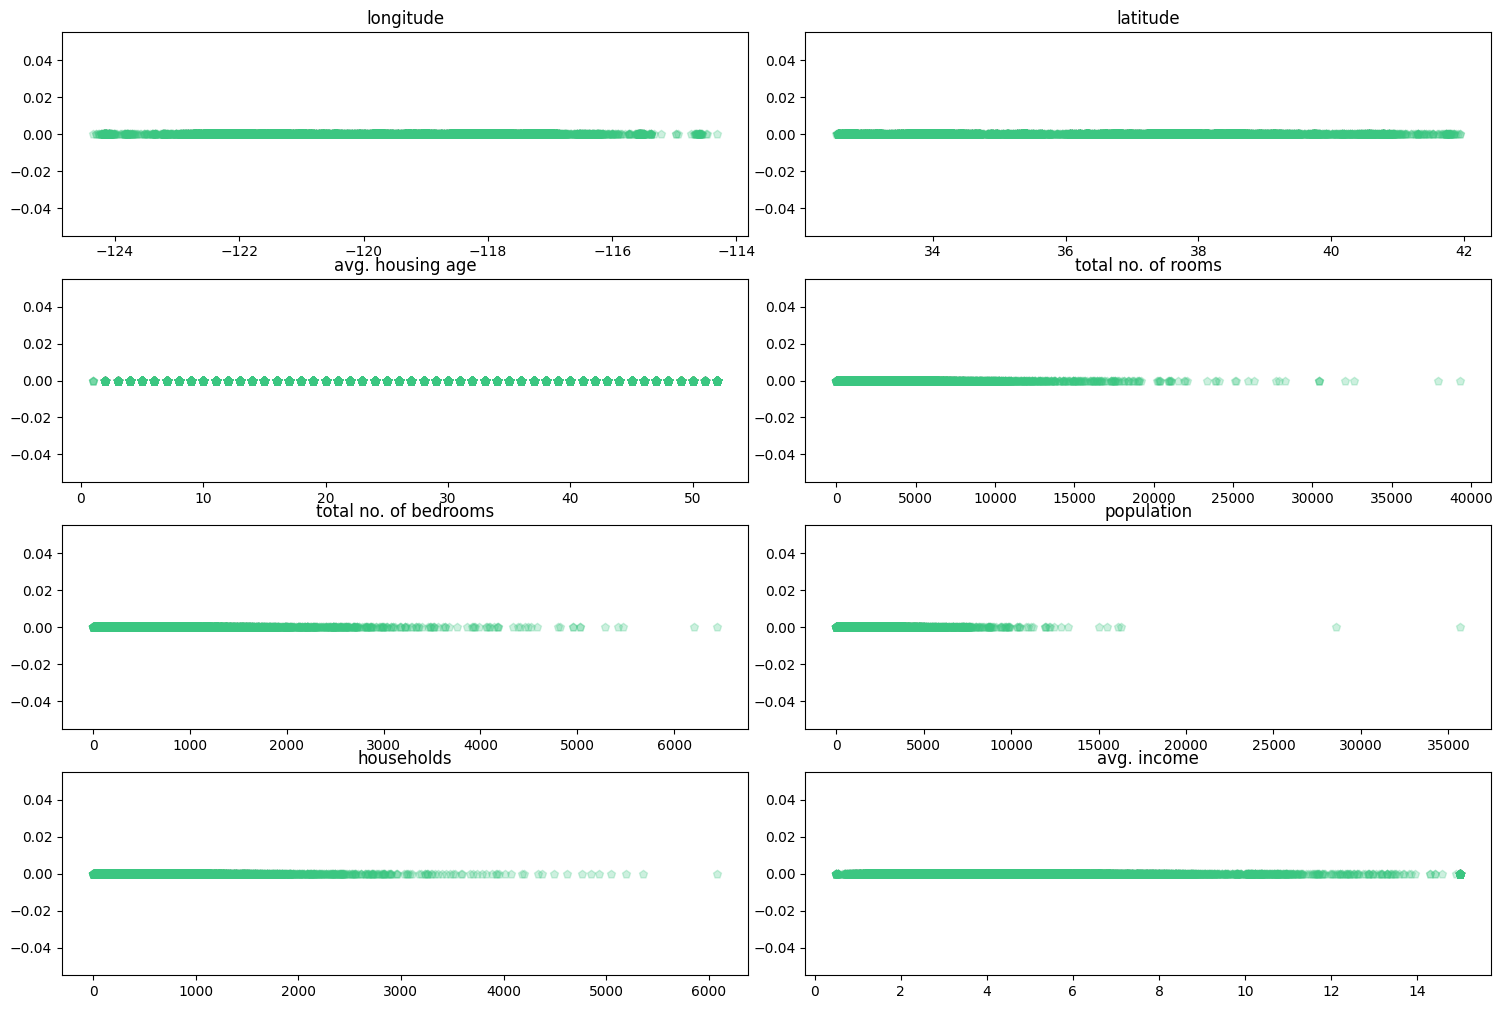

In [194]:
feature_names = ["longitude", "latitude", "avg. housing age", "total no. of rooms", "total no. of bedrooms", "population", "households", "avg. income"]
analyze(ch_X, feature_names=feature_names, color='#3BC681')

In [195]:
ch_X_trains, ch_X_cross, ch_Y_trains, ch_Y_cross = train_test_split(ch_X, ch_Y, test_size=0.3, random_state=0)

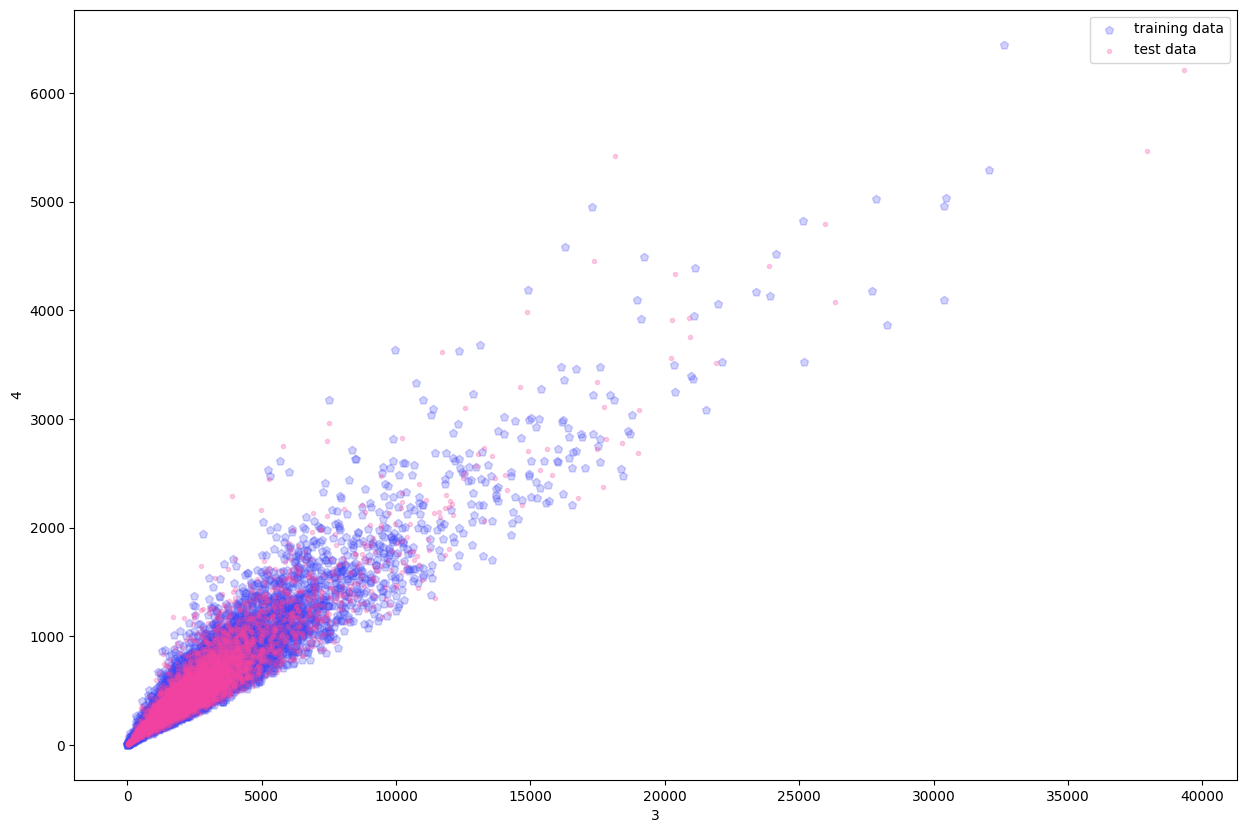

In [196]:
feature_2 = feature_names.index('total no. of bedrooms')
feature_1 = feature_names.index('total no. of rooms')
plot_train_cross_features(ch_X_trains, ch_X_cross, feature_1, feature_2)

In [197]:
ch_X_trains, ch_X_cross, ch_scaler = normalize_train_cross(ch_X_trains, ch_X_cross)

## Laptop prices (both continous & discrete inputs and continuous outputs)
1. load
2. visualize raw
3. encode categorical features
4. visualize encoded categorical features
5. split
6. visualize split

In [198]:
with open('./data/laptop_price.csv', 'rb') as file:
  result = chardet.detect(file.read())
result['encoding']

'ISO-8859-1'

In [199]:
laptop_price = pd.read_csv('./data/laptop_price.csv', index_col=0, encoding='ISO-8859-1')

# laptop_price.columns != "Price_euros"
lp_X, lp_Y = laptop_price.loc[:, laptop_price.columns != 'Price_euros'], laptop_price['Price_euros']
lp_X.reset_index(drop=True, inplace=True)

In [200]:
cat_cols = get_cat_cols(lp_X)
cat_cols

['Memory',
 'Ram',
 'Weight',
 'OpSys',
 'Product',
 'Cpu',
 'ScreenResolution',
 'Company',
 'Gpu',
 'TypeName']

['#6DFD64', '#102FCE', '#29021B', '#0FB695', '#AB7372', '#C9BB1D', '#994FB9', '#56126C', '#FBAFFA', '#03ED0C', '#34D21C', '#68ED9F', '#6FC4EA', '#65C886', '#B2C898', '#8845A5', '#8E6A4A', '#26045A', '#378A03', '#4A9A38', '#304B0C', '#BC3BB7', '#7AF6EF', '#F4ACA1', '#27A874', '#BDD89B', '#52C32F', '#1F1C98', '#A5E450', '#224037', '#9A20E1', '#4E8CB0', '#F11B78', '#87DBE3', '#342202', '#863D0A', '#8A35AC', '#458542', '#C7CF28'] 39
<BarContainer object of 39 artists>
Memory
['#BE6B7A', '#EE8369', '#C7EDD9', '#40CA8B', '#5005BA', '#AEBDB1', '#3893D4', '#1C885A', '#A48CCC'] 9
<BarContainer object of 9 artists>
Ram
['#31864C', '#5B4E13', '#F23B5A', '#1CF085', '#9B4261', '#EB9D96', '#16FCC8', '#2DB495', '#6CEAC6', '#831656', '#7BE5A7', '#26C9C4', '#716450', '#1B13EC', '#91F8C3', '#32EEE0', '#2976CC', '#C26ED1', '#8F6581', '#75882C', '#035B76', '#76F0BE', '#9116A6', '#CFF863', '#A72865', '#F01B48', '#3814E5', '#3C9FC4', '#0FBC80', '#5B97F5', '#772C61', '#56BD1A', '#89F19A', '#DC5ACE', '#024146

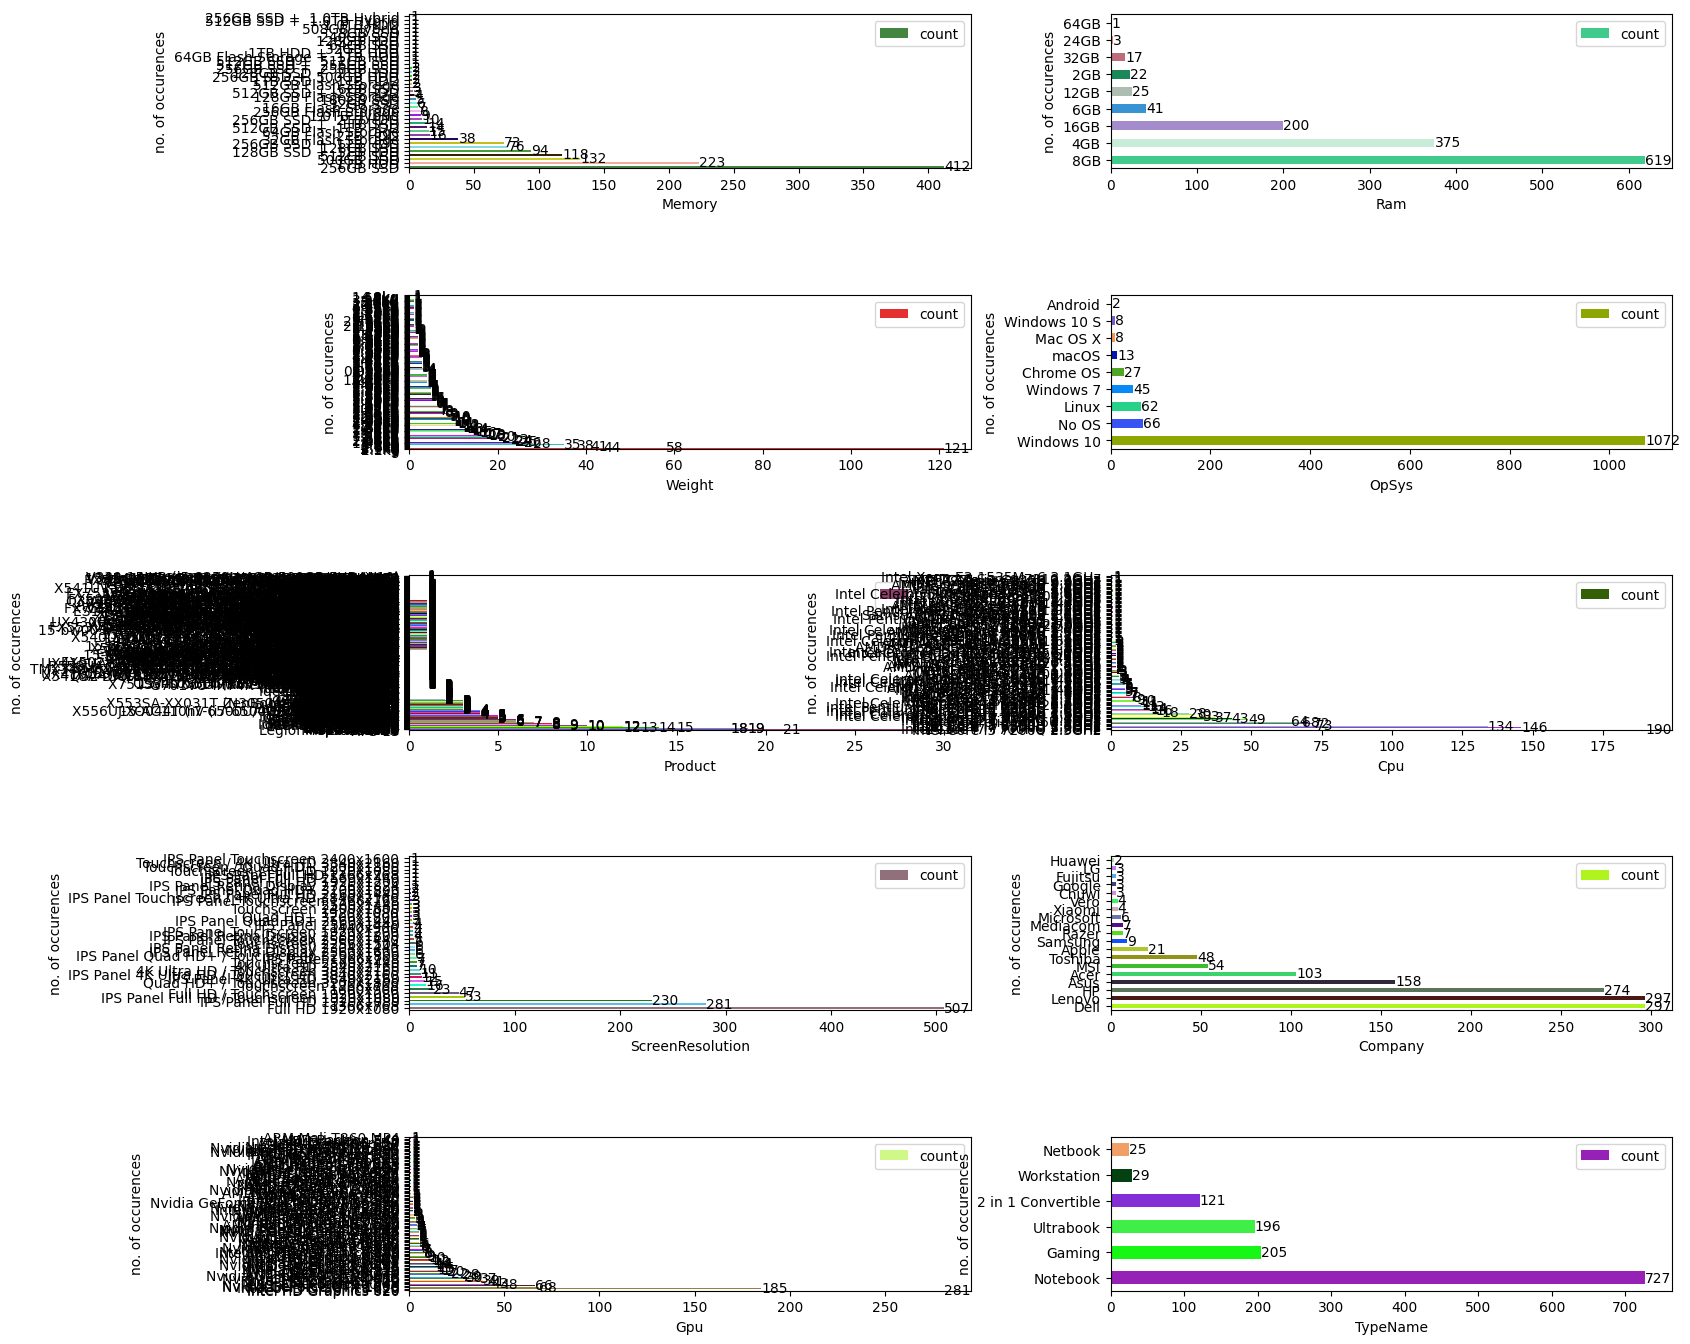

In [201]:
disp_cat_feat(lp_X, cat_cols, fig_dims=(len(cat_cols) // 2, 2))

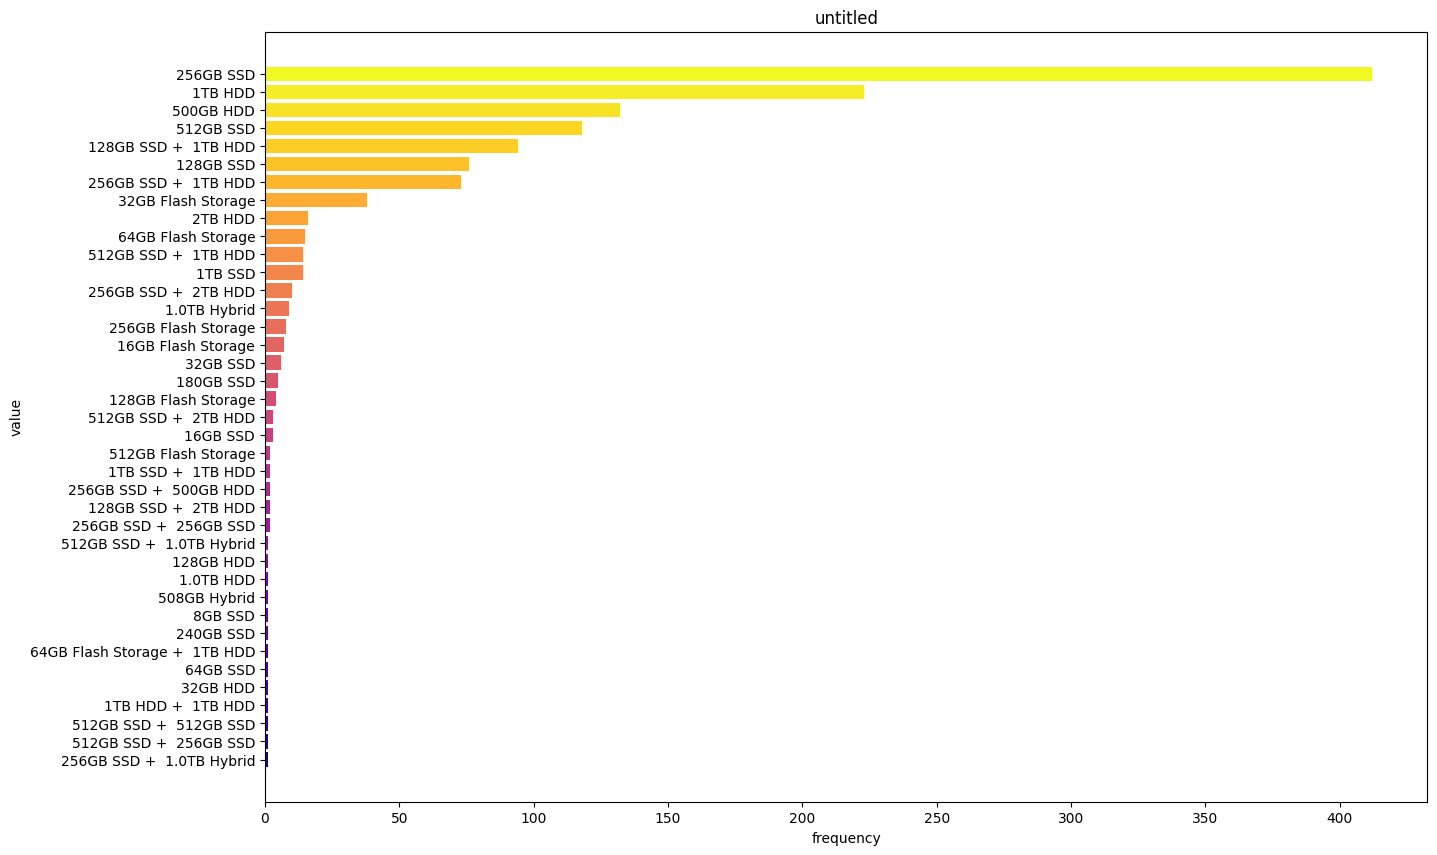

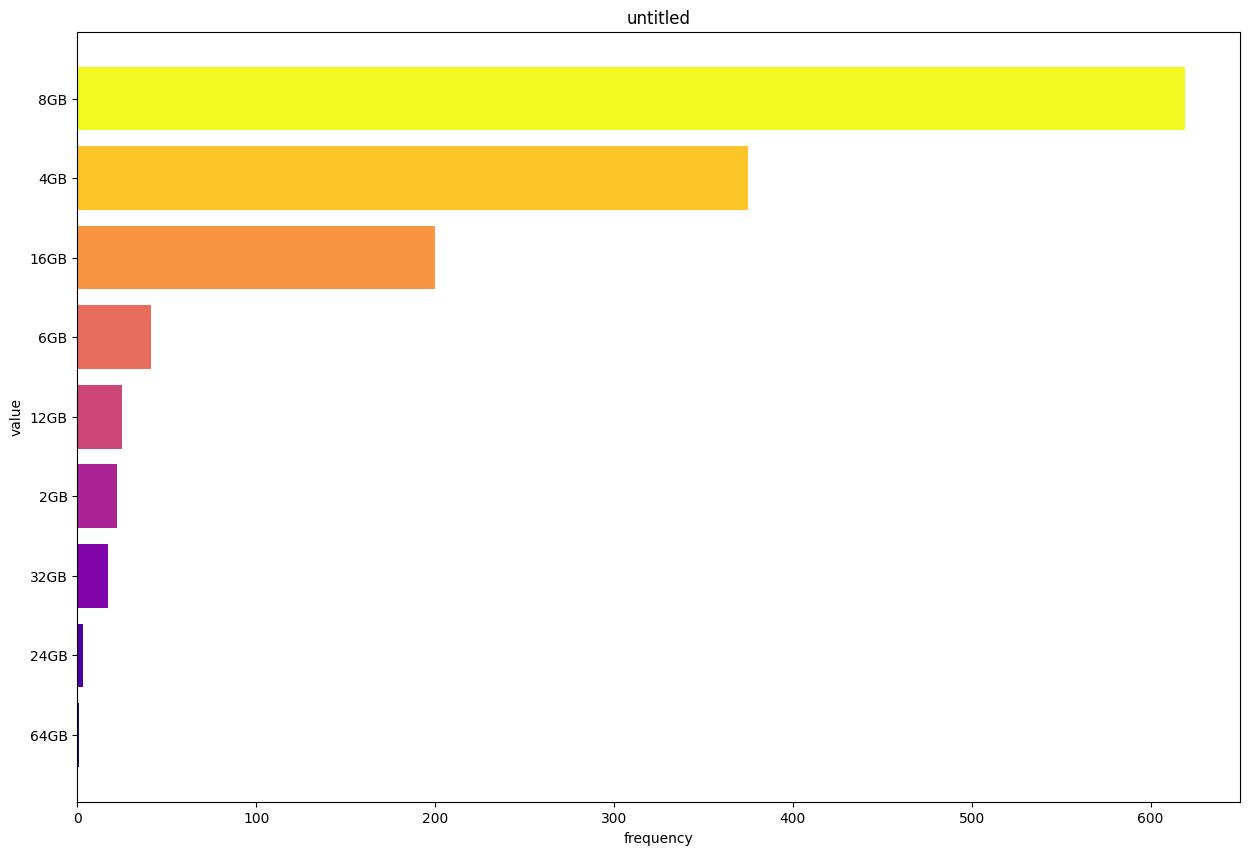

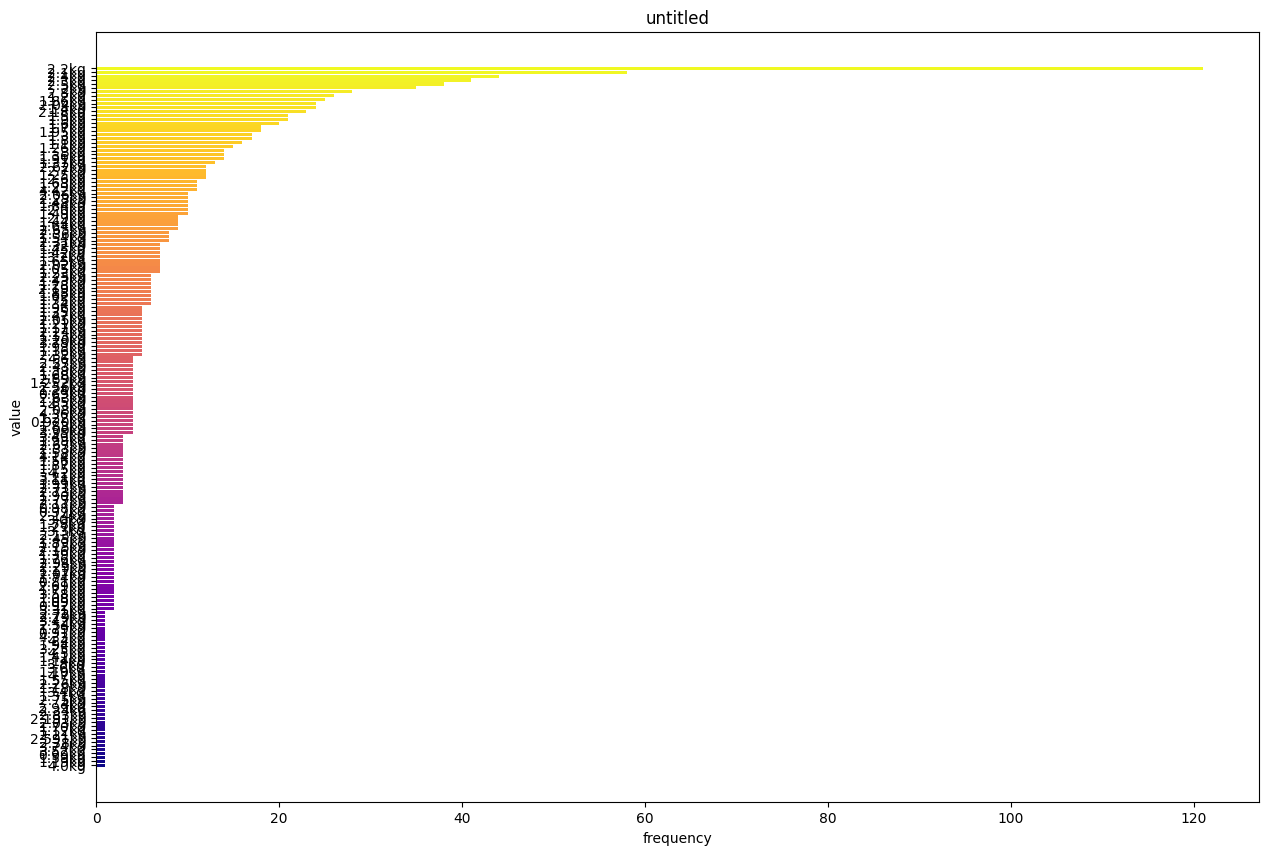

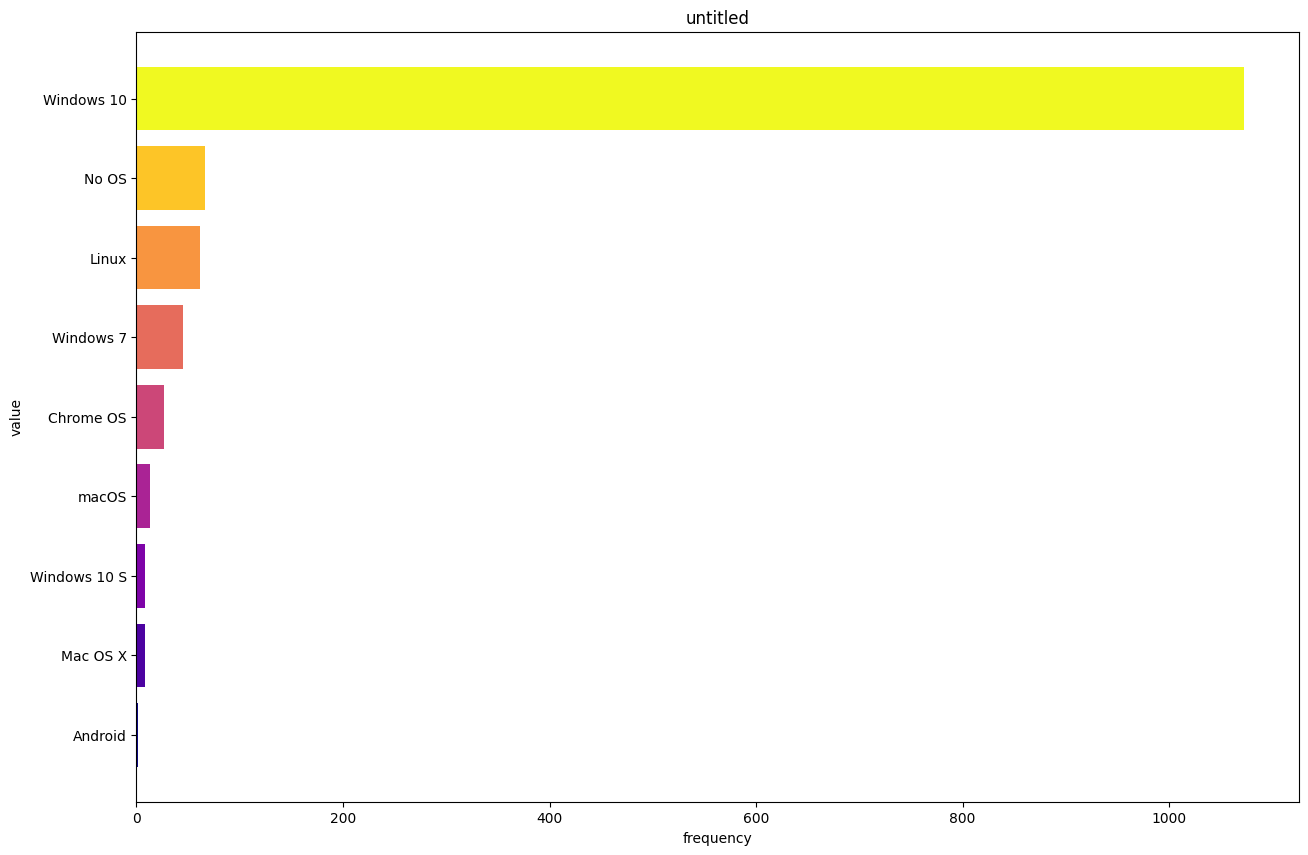

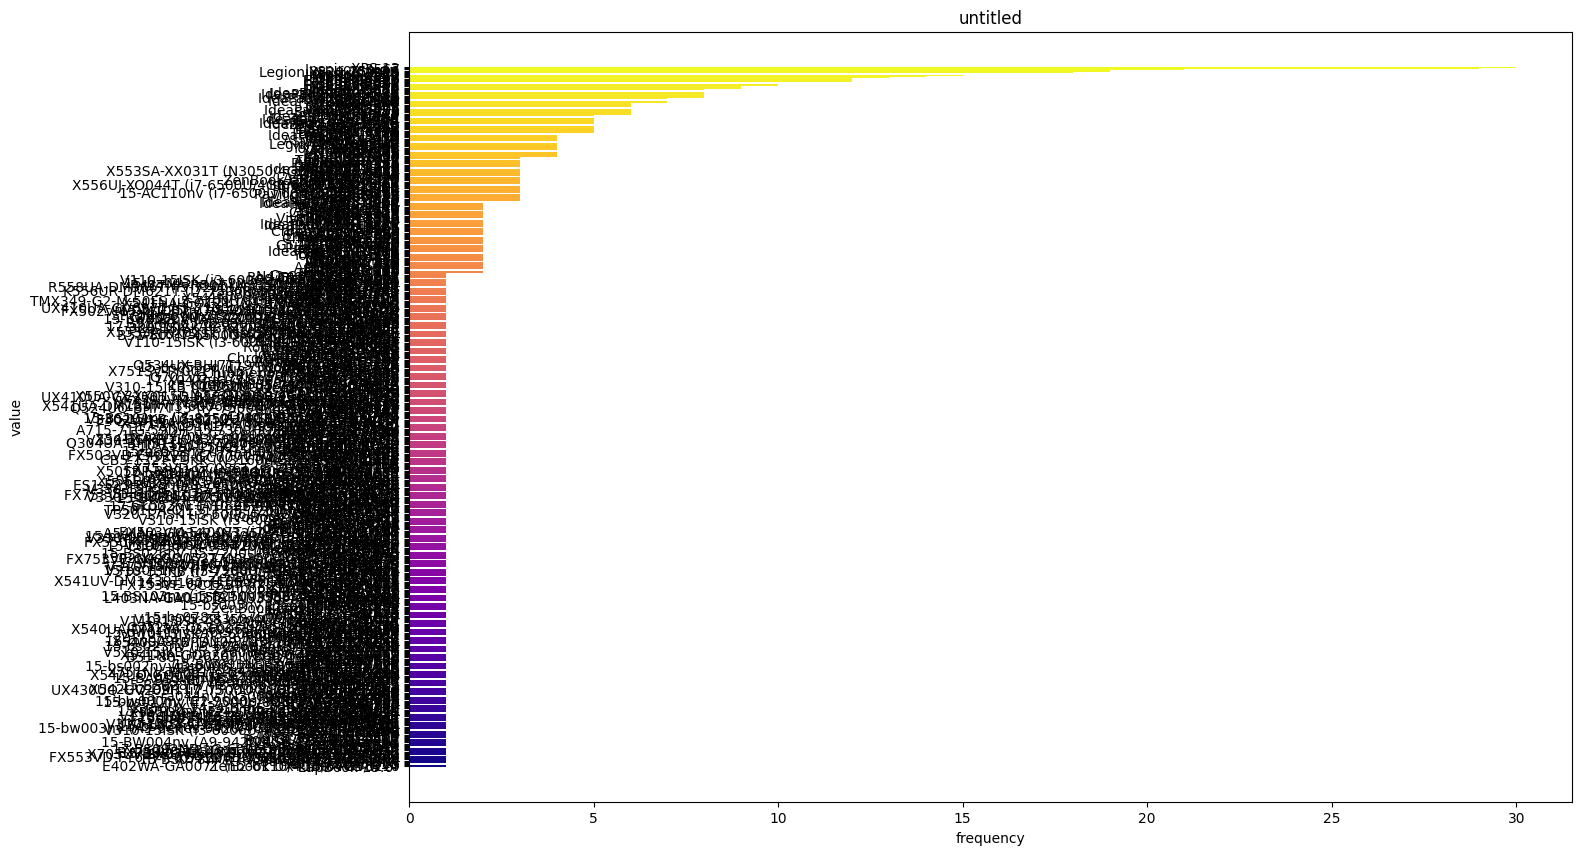

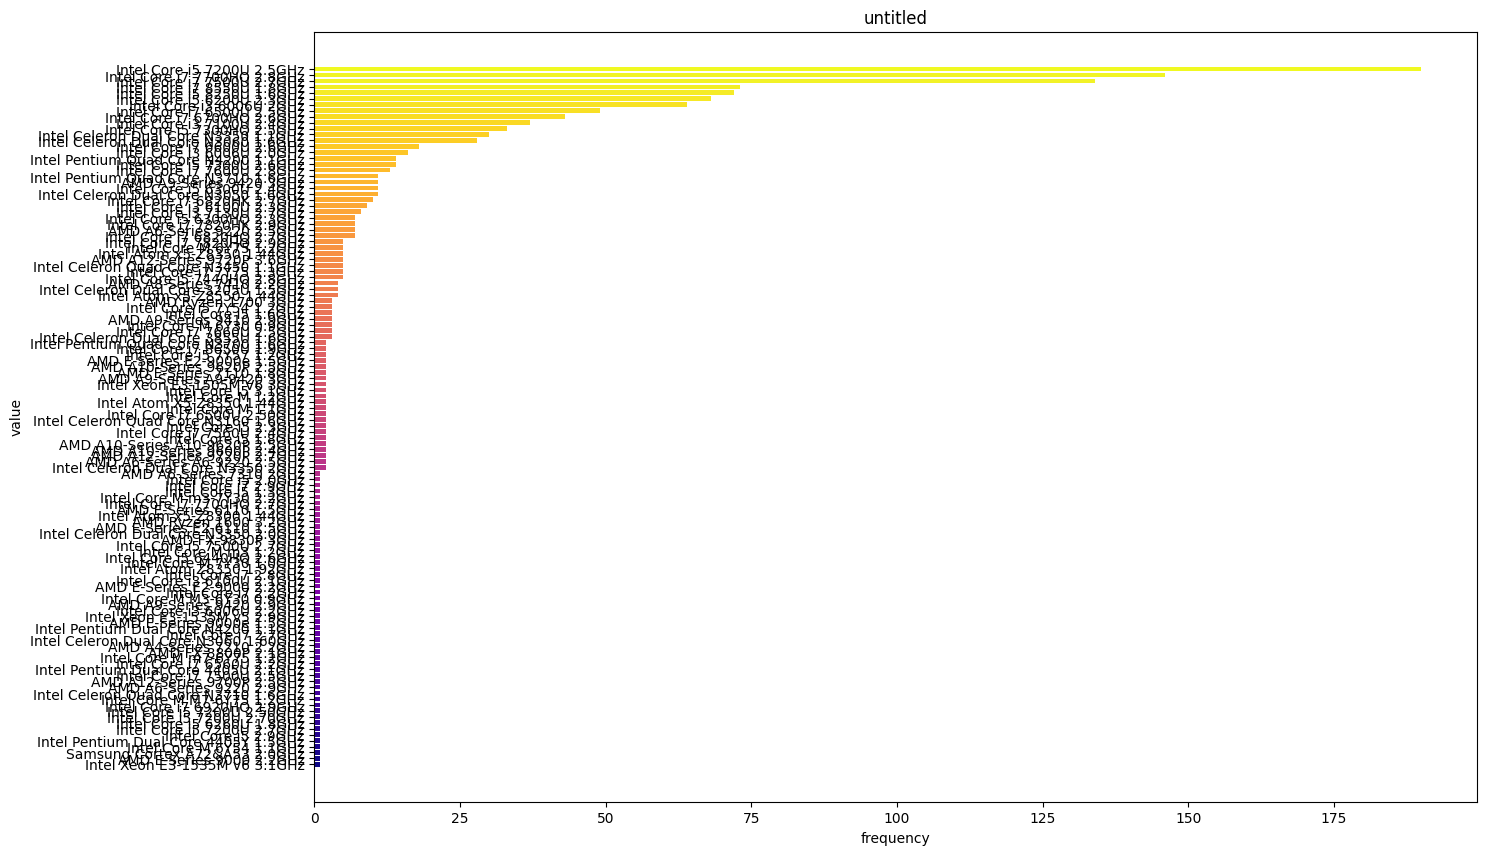

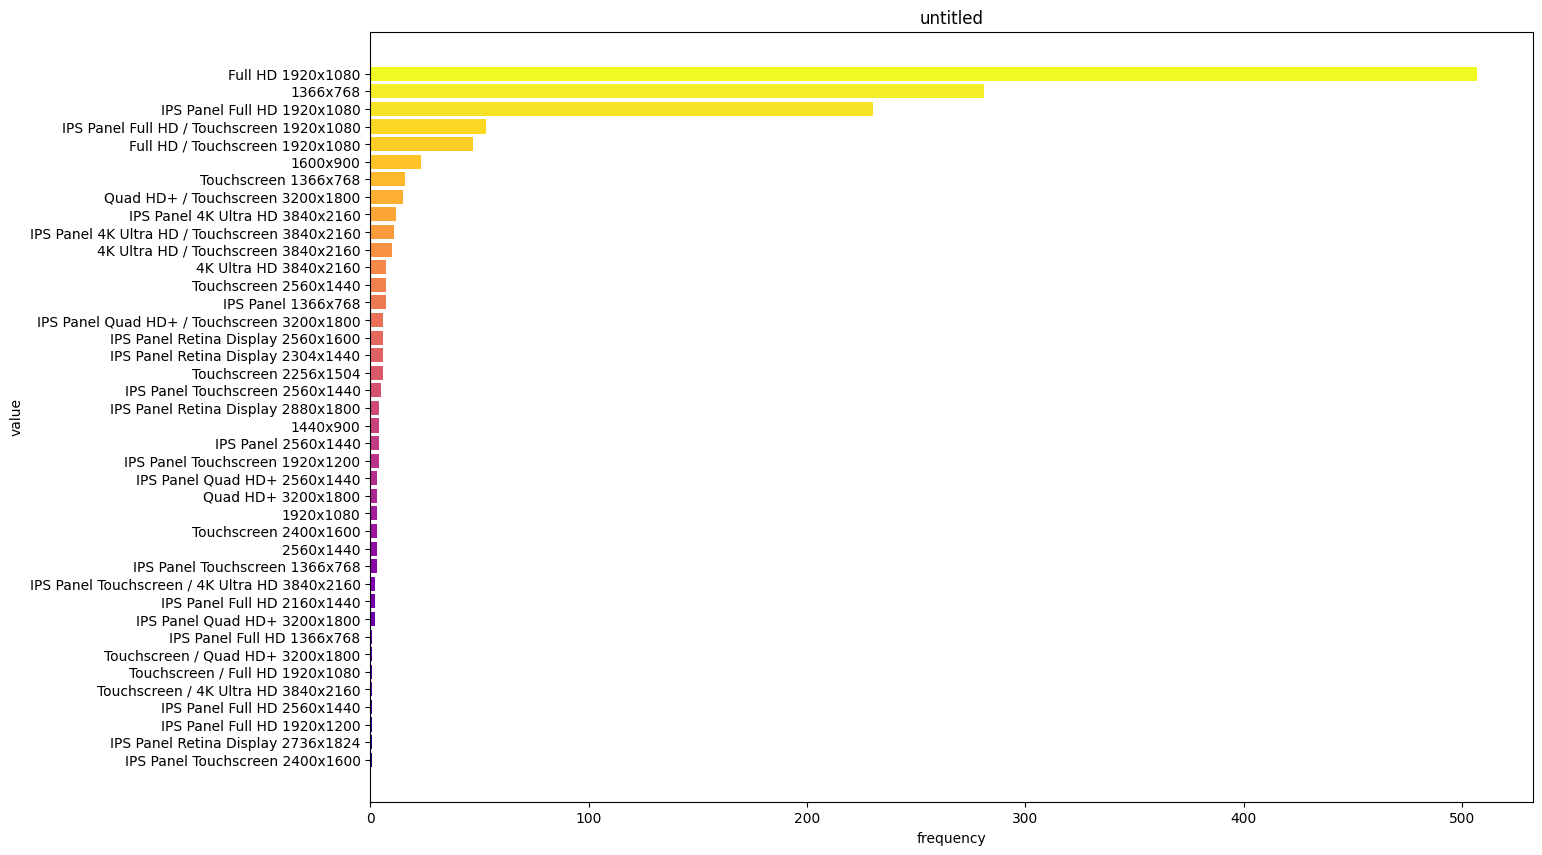

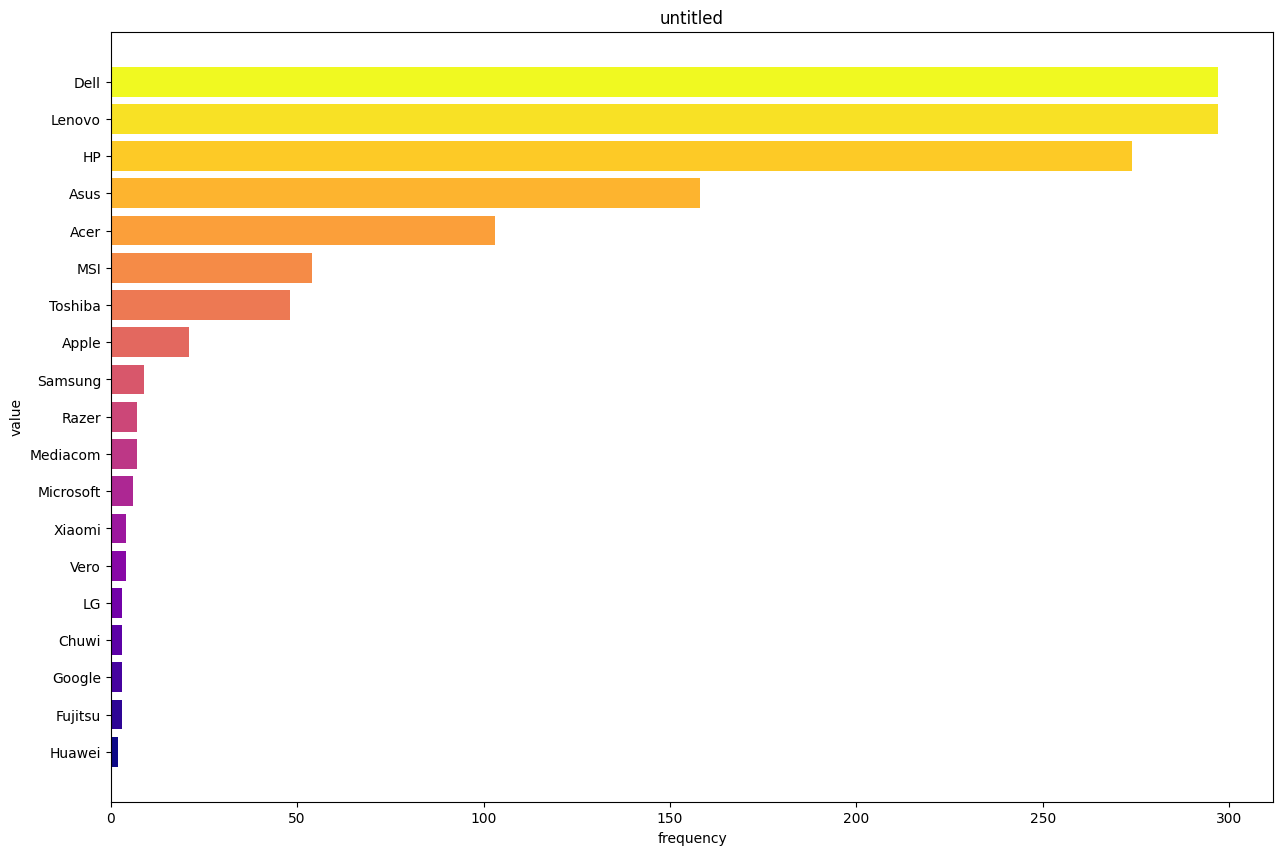

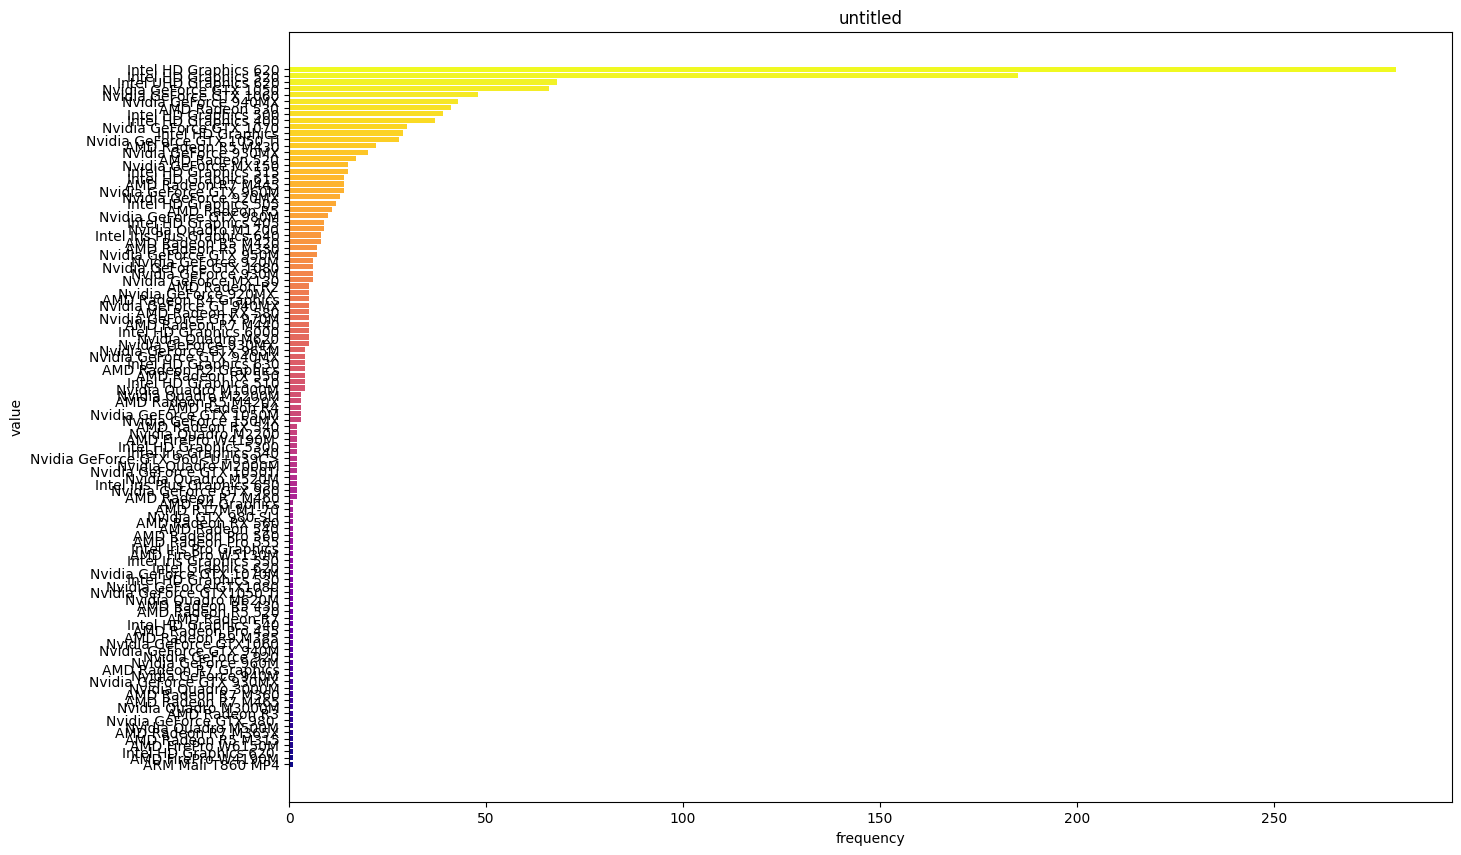

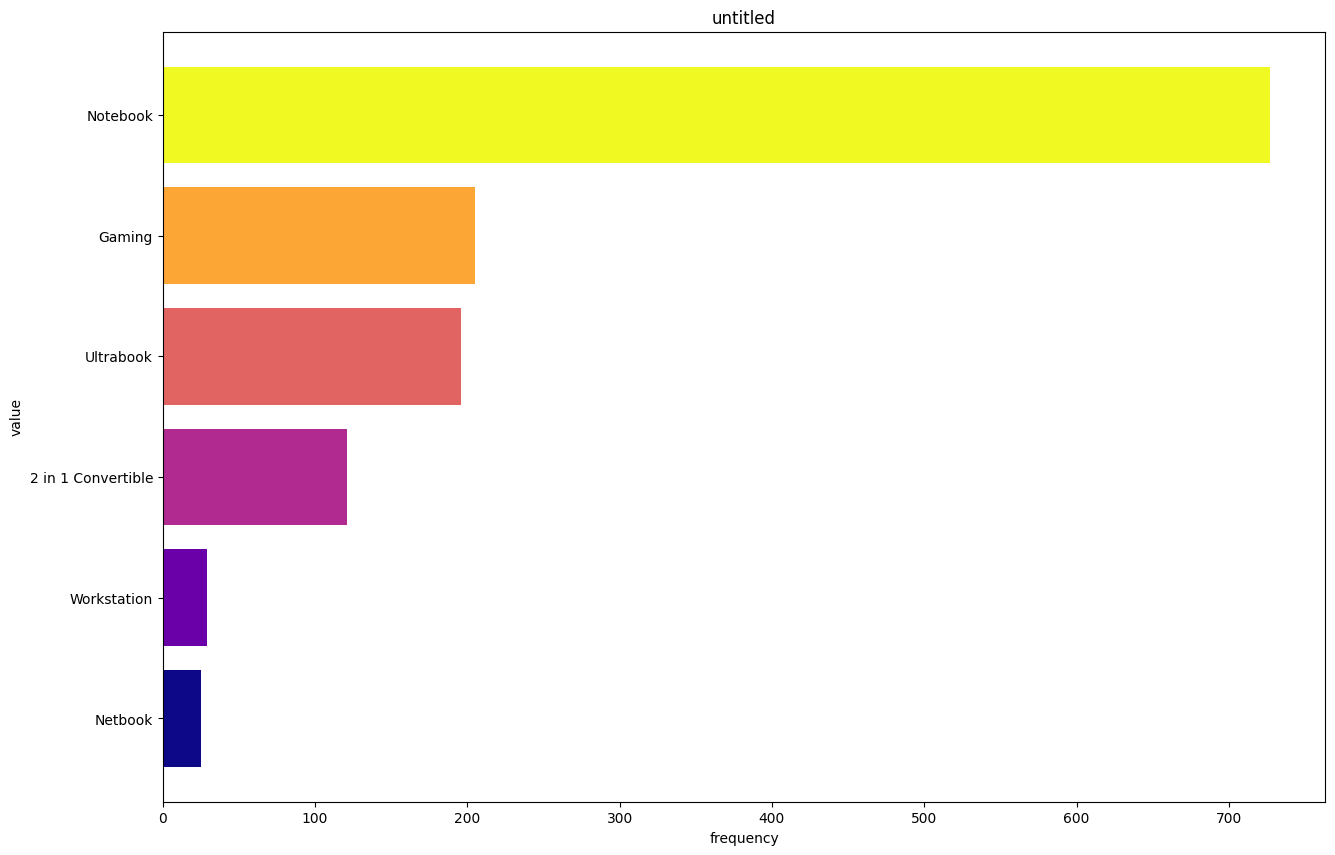

In [202]:
for cat_col in cat_cols:
    view_value_frequency(lp_X[cat_col].value_counts(), limit=lp_X[cat_col].unique().size)

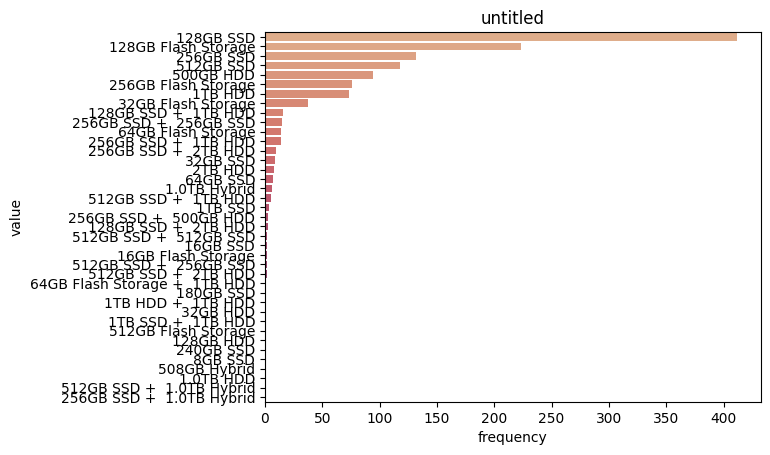

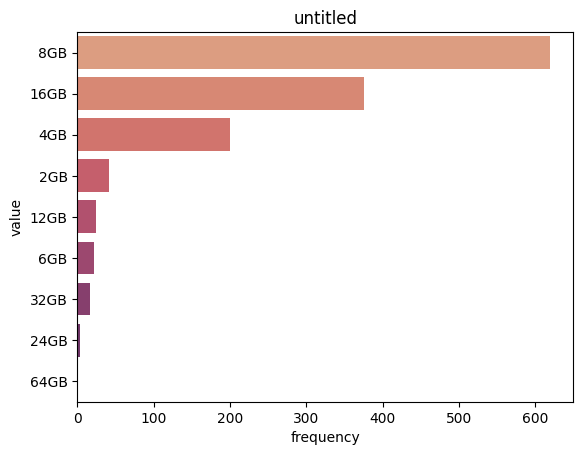

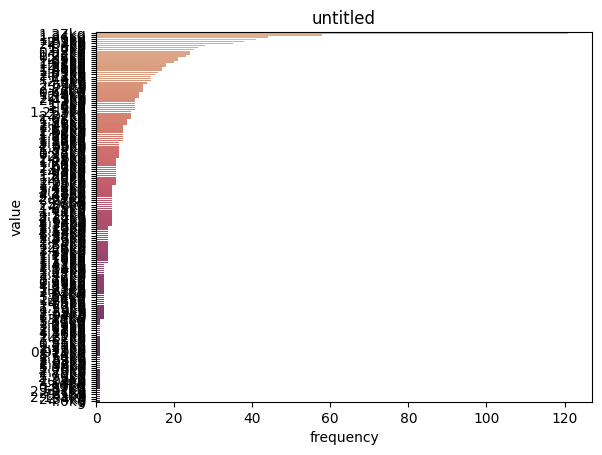

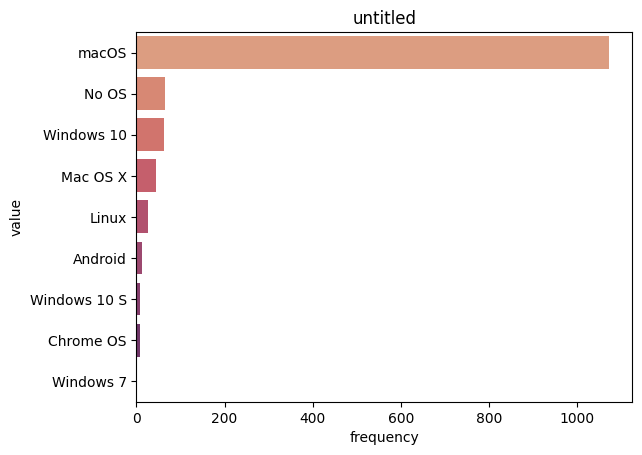

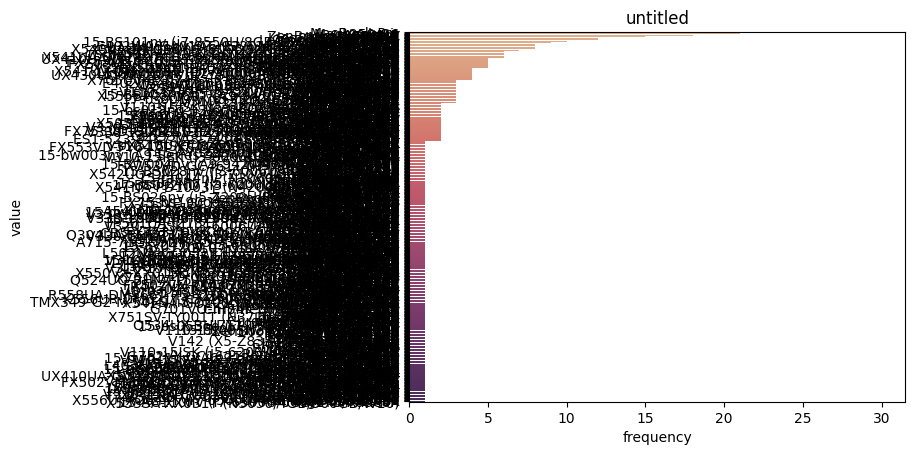

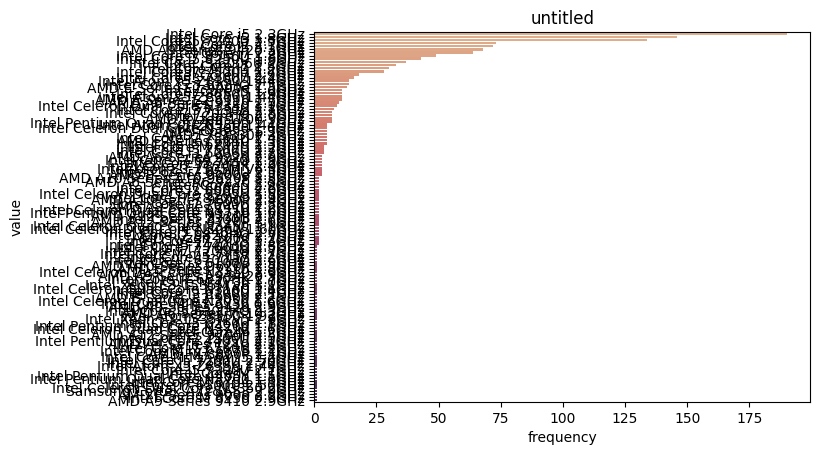

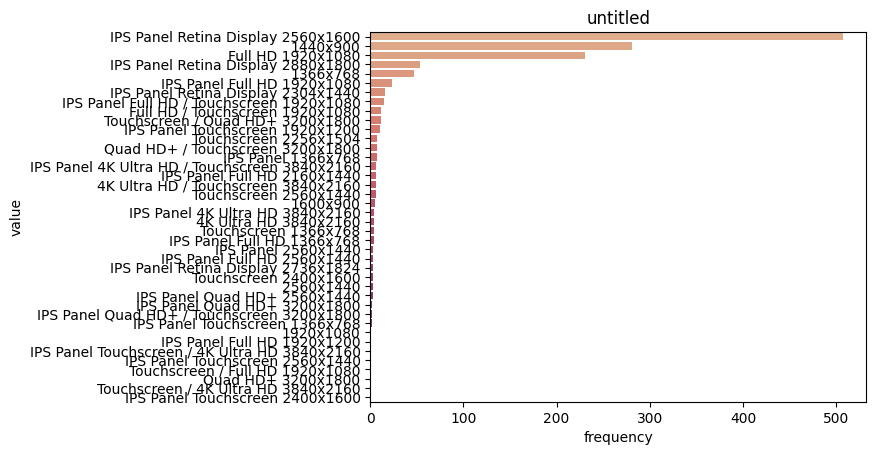

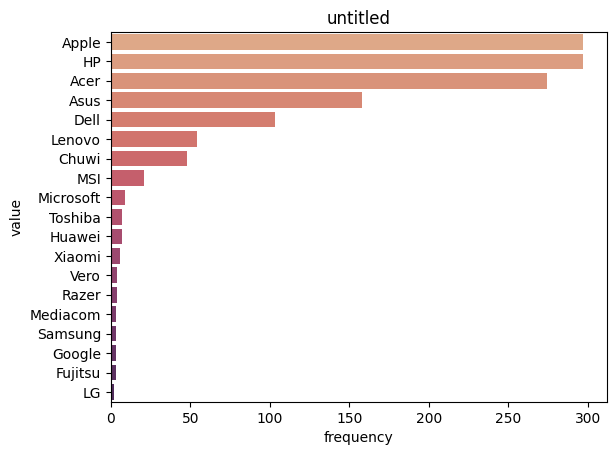

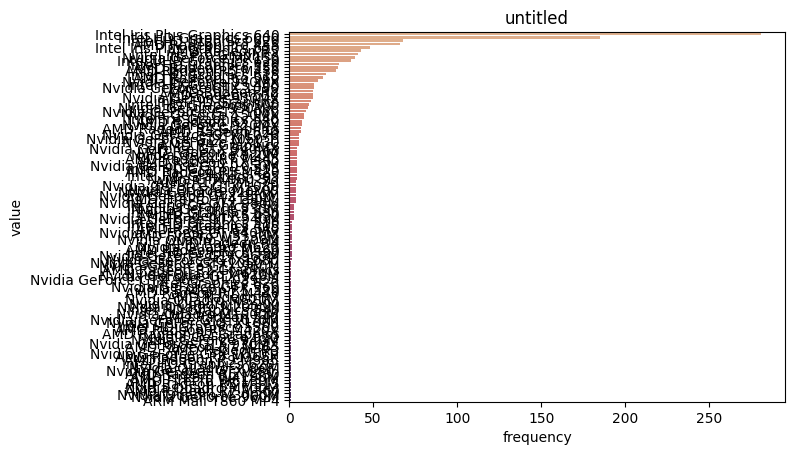

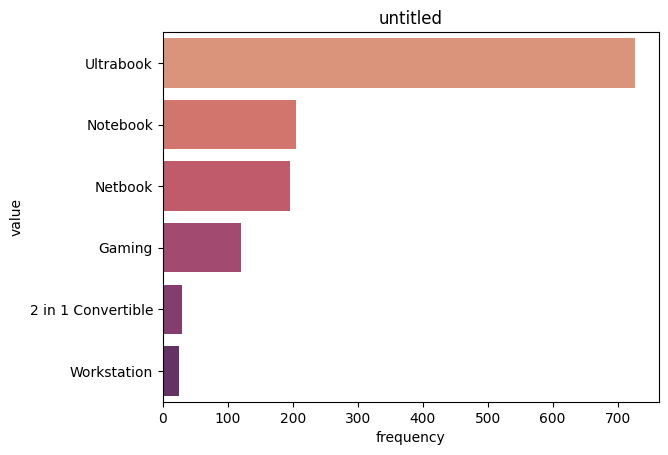

In [203]:
for cat_col in cat_cols:
    view_label_freq(lp_X[cat_col].value_counts(), labels=lp_X[cat_col].unique(), horizontal=True)

In [204]:
lp_X[cat_cols], lp_oe = encode_features(lp_X[cat_cols])
lp_X

Company  Product  TypeName  Inches  ScreenResolution  Cpu  Ram  Memory  \
0           1      300         4   13.30                23   65    8       4   
1           1      301         4   13.30                 1   63    8       2   
2           7       50         3   15.60                 8   74    8      16   
3           1      300         4   15.40                25   85    1      29   
4           1      300         4   13.30                23   67    8      16   
...       ...      ...       ...     ...               ...  ...  ...     ...   
1298       10      580         0   14.00                13   89    5       4   
1299       10      588         0   13.30                19   89    1      29   
1300       10      196         3   14.00                 0   34    3      35   
1301        7        2         3   15.60                 0   89    7      10   
1302        2      568         3   15.60                 0   34    5      26   

      Gpu  OpSys  Weight  
0      58      8      38  
1      51      8      35  
2      53      4      74  
3       9      8      71  
4      59      8      38  
...   ...    ...     ...  
1298   47      5      78  
1299   47      5      41  
1300   40      5      56  
1301   21      5     104  
1302   40      5     113  

[1303 rows x 11 columns]

In [205]:
lp_X['Ram'].unique()

array([8, 1, 5, 3, 0, 7, 4, 2, 6], dtype=int64)

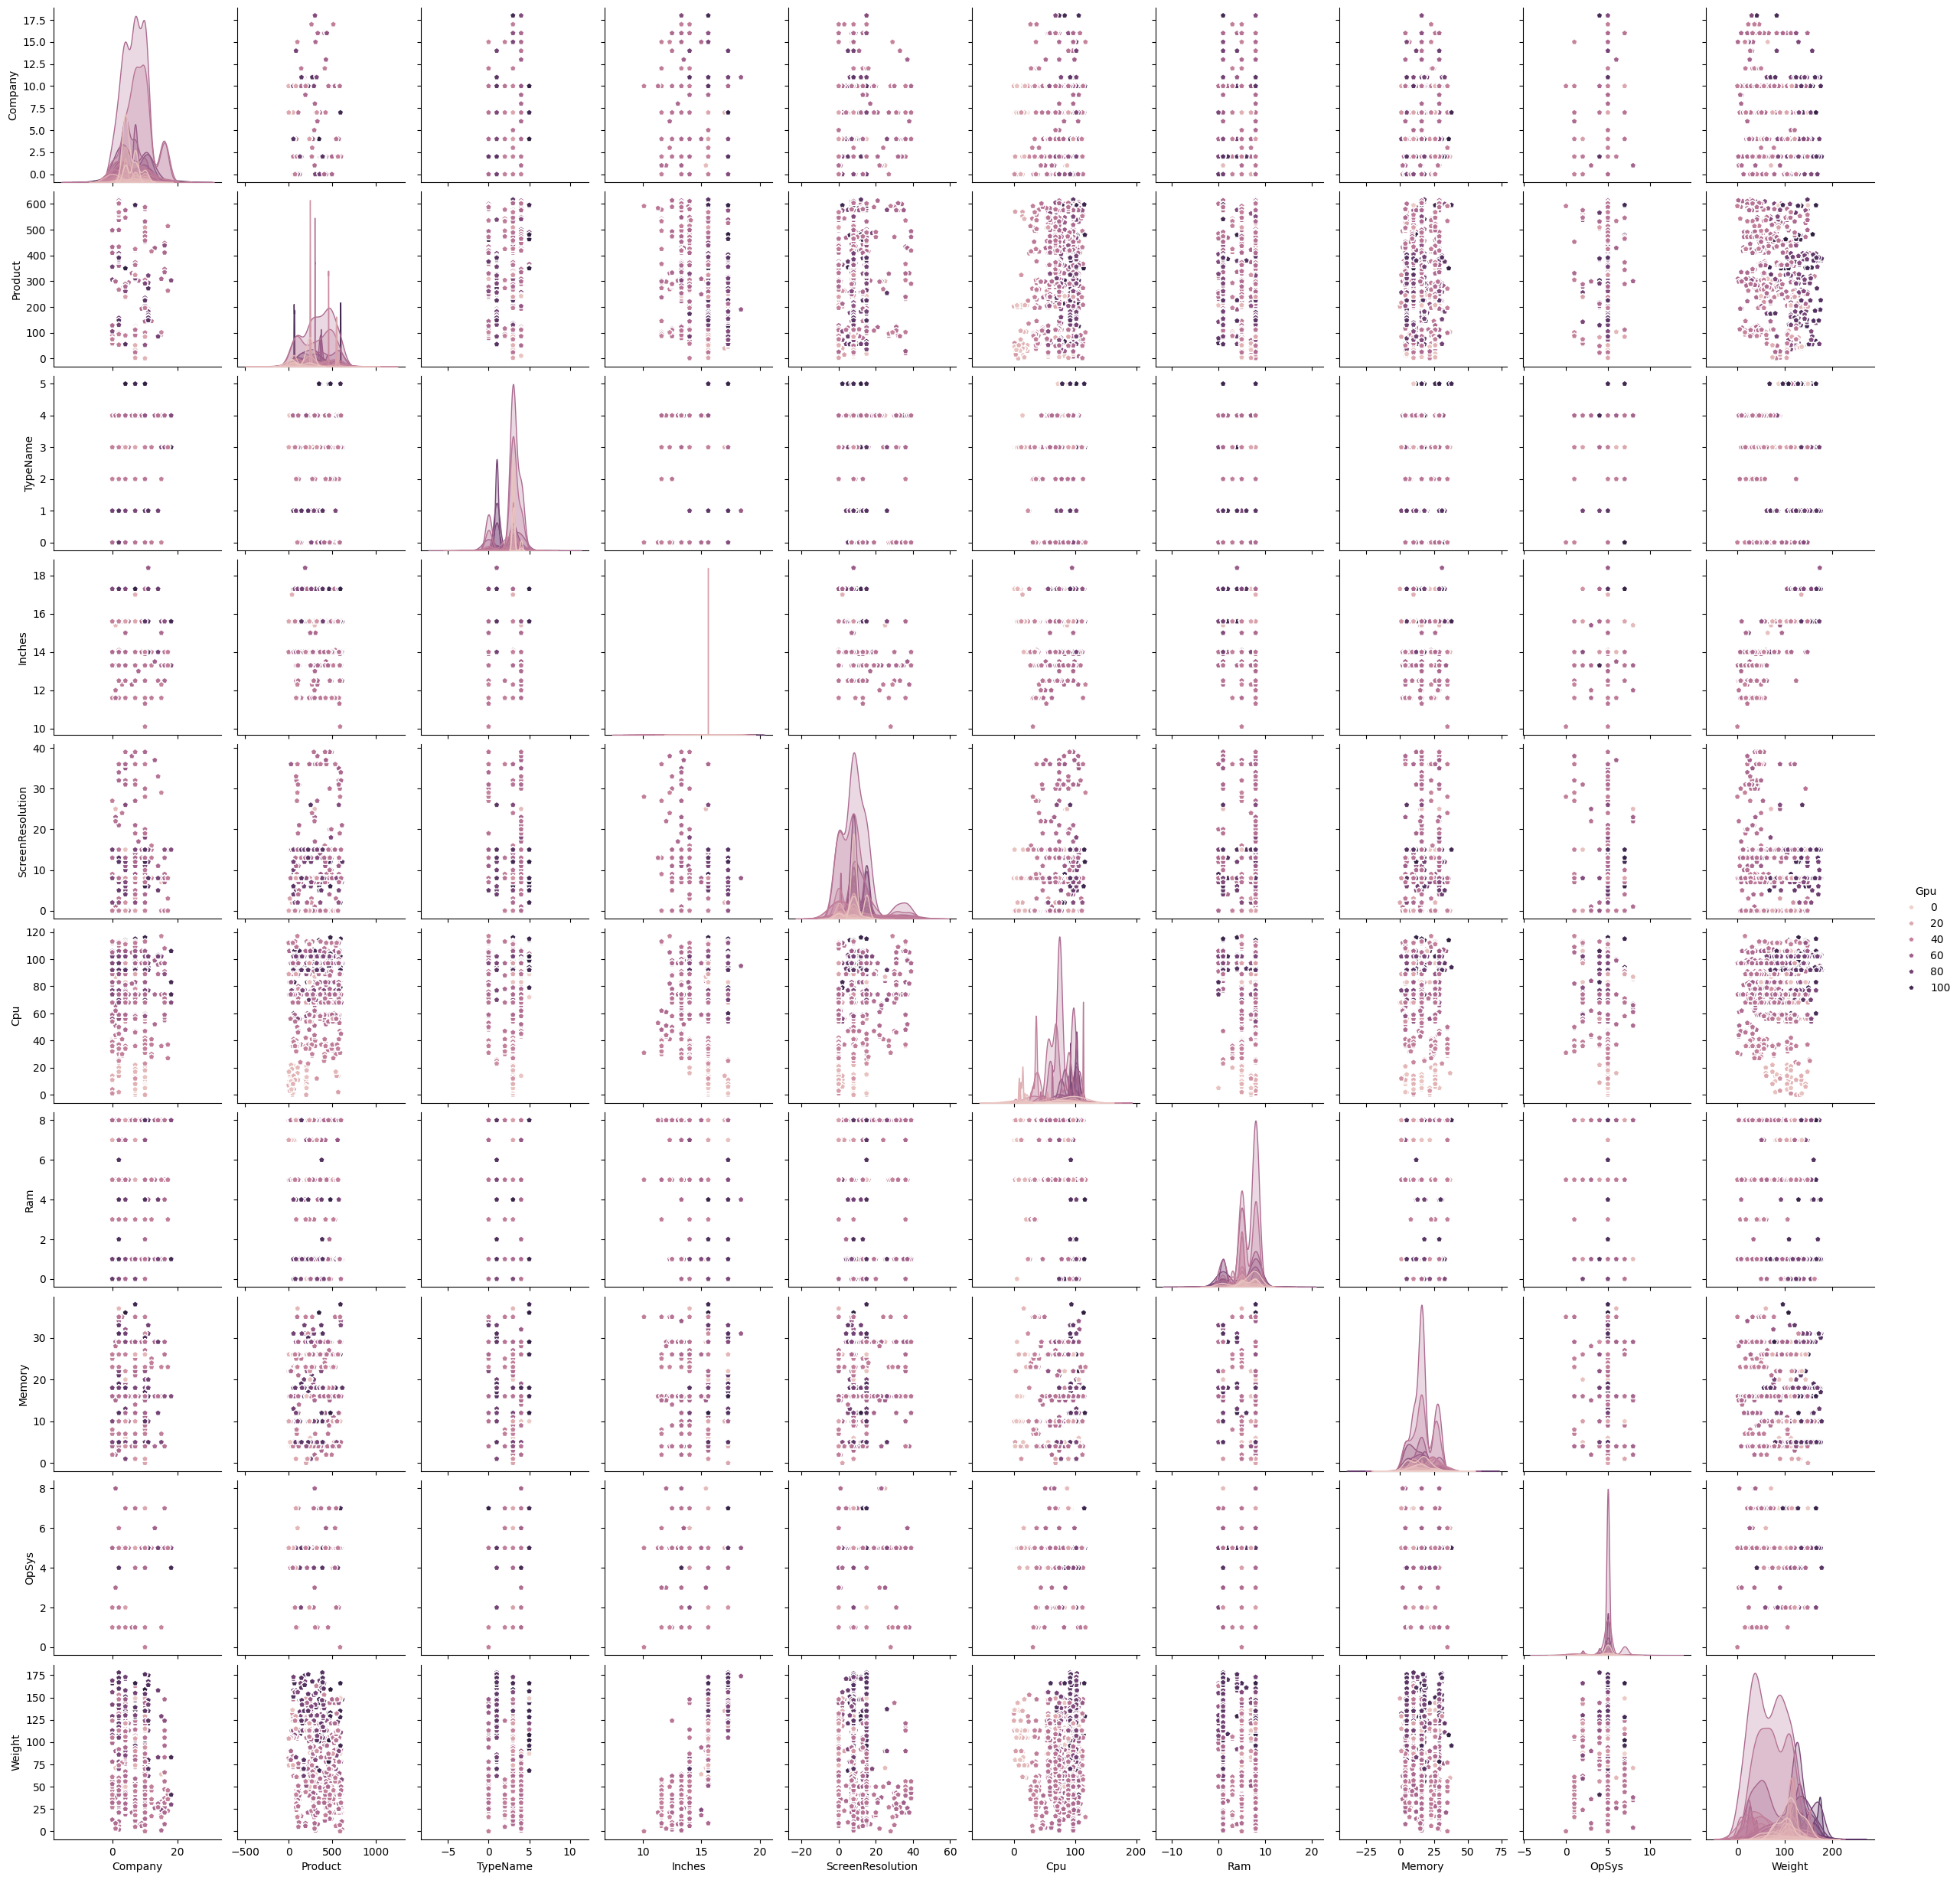

In [206]:
sb.set_palette('mako')
sb.pairplot(lp_X, hue="Gpu", plot_kws={'marker': 'p', 'linewidth': 1})

In [207]:
lp_X_trains, lp_X_cross, lp_Y_trains, lp_Y_cross = train_test_split(lp_X, lp_Y, test_size=0.3, random_state=0)

## Breast cancer diagnosis (all continuous inputs and discrete outputs)
1. load
2. visualize raw
3. encode categorical target
4. split
5. visualize split
6. normalize
7. visualize normalization

In [208]:
# use path below if in local machine
breast_cancer = pd.read_csv('./data/data.csv')
bc_X, bc_Y = breast_cancer.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1, inplace=False), breast_cancer['diagnosis']
bc_X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80    1001.00             0.12   
1          20.57         17.77          132.90    1326.00             0.08   
2          19.69         21.25          130.00    1203.00             0.11   
3          11.42         20.38           77.58     386.10             0.14   
4          20.29         14.34          135.10    1297.00             0.10   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00    1479.00             0.11   
565        20.13         28.25          131.20    1261.00             0.10   
566        16.60         28.08          108.30     858.10             0.08   
567        20.60         29.33          140.10    1265.00             0.12   
568         7.76         24.54           47.92     181.00             0.05   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0                0.28            0.30                 0.15           0.24   
1                0.08            0.09                 0.07           0.18   
2                0.16            0.20                 0.13           0.21   
3                0.28            0.24                 0.11           0.26   
4                0.13            0.20                 0.10           0.18   
..                ...             ...                  ...            ...   
564              0.12            0.24                 0.14           0.17   
565              0.10            0.14                 0.10           0.18   
566              0.10            0.09                 0.05           0.16   
567              0.28            0.35                 0.15           0.24   
568              0.04            0.00                 0.00           0.16   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                      0.08  ...         25.38          17.33   
1                      0.06  ...         24.99          23.41   
2                      0.06  ...         23.57          25.53   
3                      0.10  ...         14.91          26.50   
4                      0.06  ...         22.54          16.67   
..                      ...  ...           ...            ...   
564                    0.06  ...         25.45          26.40   
565                    0.06  ...         23.69          38.25   
566                    0.06  ...         18.98          34.12   
567                    0.07  ...         25.74          39.42   
568                    0.06  ...          9.46          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60     2019.00              0.16               0.67   
1             158.80     1956.00              0.12               0.19   
2             152.50     1709.00              0.14               0.42   
3              98.87      567.70              0.21               0.87   
4             152.20     1575.00              0.14               0.20   
..               ...         ...               ...                ...   
564           166.10     2027.00              0.14               0.21   
565           155.00     1731.00              0.12               0.19   
566           126.70     1124.00              0.11               0.31   
567           184.60     1821.00              0.17               0.87   
568            59.16      268.60              0.09               0.06   

     concavity_worst  concave points_worst  symmetry_worst  \
0               0.71                  0.27            0.46   
1               0.24                  0.19            0.28   
2               0.45                  0.24            0.36   
3               0.69                  0.26            0.66   
4               0.40                  0.16            0.24   
..               ...                   ...             ...   
564             0.41                  0.22         

In [209]:
get_cat_cols(bc_X)

[]

In [210]:
# note that 1 is now the malignant class 
# and 0 is the benign class/category
bc_Y, bc_Y_oe =  encode_features(bc_Y)
bc_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [211]:
bc_X_trains, bc_X_cross, bc_Y_trains, bc_Y_cross = train_test_split(bc_X, bc_Y, test_size=0.3, random_state=0)

In [215]:
bc_X_trains, bc_X_cross, bc_scaler = normalize_train_cross(bc_X_trains, bc_X_cross)
bc_X_trains

array([[0.21340338, 0.20248963, 0.20869325, ..., 0.25597658, 0.2712399 ,
        0.24111242],
       [0.16607506, 0.36929461, 0.15942229, ..., 0.22487082, 0.12773507,
        0.1533517 ],
       [0.2493729 , 0.34149378, 0.23826964, ..., 0.28284533, 0.30514488,
        0.17237308],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])

# Modelling

## Regression

### Ensemble Modelling

In [214]:
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

In [216]:
reg_a = LazyRegressor(
    verbose=0, 
    ignore_warnings=True, 
    custom_metric=None, 
    regressors=[LinearRegression, Ridge, Lasso, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor, SVR])
reg_models_train_a, reg_preds_train_a = reg_a.fit(ch_X_trains, ch_X_trains, ch_Y_trains, ch_Y_trains)
reg_models_cross_a, reg_preds_cross_a = reg_a.fit(ch_X_trains, ch_X_cross, ch_Y_trains, ch_Y_cross)

100%|██████████| 7/7 [01:06<00:00,  9.44s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 7/7 [00:52<00:00,  7.57s/it]


#### Here the output of the clf.fit() method that fits multiple different models is actually a dataframe containing all the multiple different models we have trained and their respective metric values like Adjusted R-squared, R-squared, RMSE, etc. that we can always access easily through indexing.

In [217]:
reg_models_train_a

Adjusted R-Squared  R-Squared      RMSE  Time Taken
Model                                                                     
DecisionTreeRegressor                1.00       1.00      0.00        0.44
RandomForestRegressor                0.97       0.97  18448.73       32.47
XGBRegressor                         0.94       0.94  27923.76        0.45
LinearRegression                     0.64       0.64  69274.83        0.05
Lasso                                0.64       0.64  69274.83        0.36
Ridge                                0.64       0.64  69274.84        0.04
SVR                                 -0.05      -0.05 118117.57       32.29

In [218]:
reg_models_cross_a

Adjusted R-Squared  R-Squared      RMSE  Time Taken
Model                                                                     
XGBRegressor                         0.82       0.82  48777.43        0.20
RandomForestRegressor                0.81       0.81  50278.56       31.81
DecisionTreeRegressor                0.65       0.65  67967.54        0.40
LinearRegression                     0.63       0.63  70128.19        0.02
Lasso                                0.63       0.63  70128.41        0.37
Ridge                                0.63       0.63  70128.69        0.02
SVR                                 -0.05      -0.05 118240.49       20.17

In [219]:
reg_b = LazyRegressor(
    verbose=0, 
    ignore_warnings=True, 
    custom_metric=None)
reg_models_train_b, reg_preds_train_b = reg_b.fit(lp_X_trains, lp_X_trains, lp_Y_trains, lp_Y_trains)
reg_models_cross_b, reg_pred_cross_b = reg_b.fit(lp_X_trains, lp_X_cross, lp_Y_trains, lp_Y_cross)

100%|██████████| 42/42 [00:05<00:00,  7.86it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 912, number of used features: 11
[LightGBM] [Info] Start training from score 1100.095526
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00,  8.56it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 912, number of used features: 11
[LightGBM] [Info] Start training from score 1100.095526


In [220]:
reg_models_train_b

Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
DecisionTreeRegressor                        1.00       1.00   12.58   
ExtraTreeRegressor                           1.00       1.00   12.58   
GaussianProcessRegressor                     1.00       1.00   12.58   
ExtraTreesRegressor                          1.00       1.00   12.58   
XGBRegressor                                 1.00       1.00   31.00   
RandomForestRegressor                        0.97       0.97  109.51   
BaggingRegressor                             0.97       0.97  124.79   
HistGradientBoostingRegressor                0.96       0.96  137.09   
LGBMRegressor                                0.96       0.96  138.41   
GradientBoostingRegressor                    0.92       0.92  185.18   
KNeighborsRegressor                          0.82       0.82  285.93   
AdaBoostRegressor                            0.64       0.64  404.69   
PoissonRegressor                             0.54       0.54  455.03   
TransformedTargetRegressor                   0.50       0.50  475.81   
Lars                                         0.50       0.50  475.81   
LinearRegression                             0.50       0.50  475.81   
Ridge                                        0.50       0.50  475.81   
RidgeCV                                      0.50       0.50  475.83   
LassoLars                                    0.50       0.50  475.83   
Lasso                                        0.50       0.50  475.83   
BayesianRidge                                0.50       0.50  475.86   
SGDRegressor                                 0.50       0.50  475.96   
LassoLarsIC                                  0.50       0.50  476.08   
LarsCV                                       0.49       0.50  478.40   
LassoLarsCV                                  0.49       0.50  478.40   
LassoCV                                      0.49       0.50  478.51   
OrthogonalMatchingPursuitCV                  0.48       0.49  483.64   
HuberRegressor                               0.48       0.48  484.37   
ElasticNetCV                                 0.48       0.48  484.87   
ElasticNet                                   0.47       0.47  489.72   
PassiveAggressiveRegressor                   0.46       0.46  494.72   
GammaRegressor                               0.43       0.44  505.84   
TweedieRegressor                             0.42       0.43  509.05   
OrthogonalMatchingPursuit                    0.29       0.30  562.72   
RANSACRegressor                              0.17       0.18  611.64   
NuSVR                                        0.02       0.04  661.77   
SVR                                         -0.01       0.01  672.22   
DummyRegressor                              -0.01       0.00  674.23   
LinearSVR                                   -0.24      -0.23  747.59   
MLPRegressor                                -0.78      -0.76  894.52   
KernelRidge                                 -2.20      -2.16 1198.58   

                               Time Taken  
Model                                      
DecisionTreeRegressor                0.02  
ExtraTreeRegressor                   0.02  
GaussianProcessRegressor             0.24  
ExtraTreesRegressor                  0.69  
XGBRegressor                         0.10  
RandomForestRegressor                1.12  
BaggingRegressor                     0.13  
HistGradientBoostingRegressor        0.42  
LGBMRegressor                        0.16  
GradientBoostingRegressor            0.22  
KNeighborsRegressor                  0.03  
AdaBoostRegressor                    0.21  
PoissonRegressor                     0.02  
TransformedTargetRegressor           0.01  
Lars                                 0.02  
LinearRegression                     0.01  
Ridge                                0.02  
RidgeCV                              0.02  
LassoLars                            0.01  
Lasso     

In [221]:
reg_models_cross_b

Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          0.80       0.81  328.89   
GradientBoostingRegressor                    0.80       0.80  332.52   
RandomForestRegressor                        0.79       0.80  338.34   
XGBRegressor                                 0.79       0.79  340.89   
LGBMRegressor                                0.79       0.79  341.50   
HistGradientBoostingRegressor                0.78       0.79  347.35   
BaggingRegressor                             0.77       0.77  356.69   
DecisionTreeRegressor                        0.69       0.70  408.84   
KNeighborsRegressor                          0.64       0.65  446.39   
AdaBoostRegressor                            0.54       0.56  499.21   
ExtraTreeRegressor                           0.50       0.52  521.57   
PoissonRegressor                             0.45       0.47  546.89   
SGDRegressor                                 0.40       0.42  573.09   
TransformedTargetRegressor                   0.40       0.42  573.48   
LinearRegression                             0.40       0.42  573.48   
Lars                                         0.40       0.42  573.48   
Ridge                                        0.40       0.42  573.51   
RidgeCV                                      0.40       0.41  573.82   
LassoLars                                    0.40       0.41  573.97   
Lasso                                        0.40       0.41  573.98   
BayesianRidge                                0.40       0.41  574.07   
LassoLarsIC                                  0.39       0.41  575.31   
LassoLarsCV                                  0.38       0.40  580.59   
LarsCV                                       0.38       0.40  580.59   
LassoCV                                      0.38       0.40  580.76   
HuberRegressor                               0.38       0.40  582.38   
ElasticNetCV                                 0.37       0.39  586.17   
PassiveAggressiveRegressor                   0.36       0.38  590.99   
OrthogonalMatchingPursuitCV                  0.36       0.38  591.05   
ElasticNet                                   0.36       0.38  591.09   
GammaRegressor                               0.33       0.35  606.82   
TweedieRegressor                             0.32       0.34  609.23   
OrthogonalMatchingPursuit                    0.21       0.23  658.11   
RANSACRegressor                              0.11       0.14  695.60   
NuSVR                                       -0.03       0.00  749.90   
DummyRegressor                              -0.04      -0.01  754.05   
SVR                                         -0.08      -0.05  767.48   
LinearSVR                                   -0.34      -0.30  855.77   
MLPRegressor                                -0.74      -0.69  974.90   
KernelRidge                                 -1.86      -1.78 1250.41   
GaussianProcessRegressor                   -47.15     -45.79 5129.98   

                               Time Taken  
Model                                      
ExtraTreesRegressor                  0.67  
GradientBoostingRegressor            0.22  
RandomForestRegressor                1.06  
XGBRegressor                         0.17  
LGBMRegressor                        0.10  
HistGradientBoostingRegressor        0.41  
BaggingRegressor                     0.12  
DecisionTreeRegressor                0.02  
KNeighborsRegressor                  0.02  
AdaBoostRegressor                    0.18  
ExtraTreeRegressor                   0.02  
PoissonRegressor                     0.02  
SGDRegressor                         0.02  
TransformedTargetRegressor           0.01  
LinearRegression                     0.01  
Lars                                 0.01  
Ridge                                0.01  
RidgeCV                              0.01  
LassoLars                            0.01  
Lasso     

### Individual Modelling
once we identify the top 3 to 6 models using the LazyRegressor or LazyClassifier objects we can individually train them and tune their hyperparameters using grid search

#### Linear Regression

In [222]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Pipeline is akin to a Sequential class in tf where architecture of model is defined
from sklearn.pipeline import Pipeline

In [223]:
poly = PolynomialFeatures(degree=2, include_bias=False)
scaler = StandardScaler()
model = LinearRegression()

poly_model = Pipeline([
    ("engineered features", poly),
    ("input normalizer|standardizer", scaler),
    ("linear regression model", model),
])

poly_model.fit(ch_X_trains, ch_Y_trains)

Pipeline(steps=[('engineered features', PolynomialFeatures(include_bias=False)),
                ('input normalizer|standardizer', StandardScaler()),
                ('linear regression model', LinearRegression())])

In [224]:
poly_model.score(ch_X_cross, ch_Y_cross)

0.6945189151554465

In [225]:
# merge both first 10 rows of training and testing model dataframes
top_reg_models_a = get_top_models(reg_models_train_a, reg_models_cross_a)
top_reg_models_a

Model  Train Adjusted R-Squared  Train R-Squared  \
0  DecisionTreeRegressor                      1.00             1.00   
1  RandomForestRegressor                      0.97             0.97   
2           XGBRegressor                      0.94             0.94   
3       LinearRegression                      0.64             0.64   
4                  Lasso                      0.64             0.64   
5                  Ridge                      0.64             0.64   
6                    SVR                     -0.05            -0.05   

   Train RMSE  Train Time Taken  Cross Adjusted R-Squared  Cross R-Squared  \
0        0.00              0.44                      0.65             0.65   
1    18448.73             32.47                      0.81             0.81   
2    27923.76              0.45                      0.82             0.82   
3    69274.83              0.05                      0.63             0.63   
4    69274.83              0.36                      0.63             0.63   
5    69274.84              0.04                      0.63             0.63   
6   118117.57             32.29                     -0.05            -0.05   

   Cross RMSE  Cross Time Taken  
0    67967.54              0.40  
1    50278.56             31.81  
2    48777.43              0.20  
3    70128.19              0.02  
4    70128.41              0.37  
5    70128.69              0.02  
6   118240.49             20.17

In [226]:
# merge both first 10 rows of training and testing model dataframes
top_reg_models_b = get_top_models(reg_models_train_b, reg_models_cross_b)
top_reg_models_b

Model  Train Adjusted R-Squared  Train R-Squared  \
0          DecisionTreeRegressor                      1.00             1.00   
1            ExtraTreesRegressor                      1.00             1.00   
2                   XGBRegressor                      1.00             1.00   
3          RandomForestRegressor                      0.97             0.97   
4               BaggingRegressor                      0.97             0.97   
5  HistGradientBoostingRegressor                      0.96             0.96   
6                  LGBMRegressor                      0.96             0.96   
7      GradientBoostingRegressor                      0.92             0.92   

   Train RMSE  Train Time Taken  Cross Adjusted R-Squared  Cross R-Squared  \
0       12.58              0.02                      0.69             0.70   
1       12.58              0.69                      0.80             0.81   
2       31.00              0.10                      0.79             0.79   
3      109.51              1.12                      0.79             0.80   
4      124.79              0.13                      0.77             0.77   
5      137.09              0.42                      0.78             0.79   
6      138.41              0.16                      0.79             0.79   
7      185.18              0.22                      0.80             0.80   

   Cross RMSE  Cross Time Taken  
0      408.84              0.02  
1      328.89              0.67  
2      340.89              0.17  
3      338.34              1.06  
4      356.69              0.12  
5      347.35              0.41  
6      341.50              0.10  
7      332.52              0.22

## Classification

### Ensemble Modelling

In [227]:
from lazypredict.Supervised import LazyClassifier

In [228]:
clf_a = LazyClassifier(
    verbose=0, 
    ignore_warnings=True, 
    custom_metric=None,)
clf_models_train_a, clf_preds_train_a = clf_a.fit(bc_X_trains, bc_X_trains, bc_Y_trains, bc_Y_trains)
clf_models_cross_a, clf_preds_cross_a = clf_a.fit(bc_X_trains, bc_X_cross, bc_Y_trains, bc_Y_cross)

100%|██████████| 29/29 [00:02<00:00, 10.33it/s]


[LightGBM] [Info] Number of positive: 149, number of negative: 249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3970
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374372 -> initscore=-0.513507
[LightGBM] [Info] Start training from score -0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

100%|██████████| 29/29 [00:01<00:00, 17.89it/s]

[LightGBM] [Info] Number of positive: 149, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3970
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374372 -> initscore=-0.513507
[LightGBM] [Info] Start training from score -0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [229]:
clf_models_train_a

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
LabelSpreading                     1.00               1.00     1.00      1.00   
LabelPropagation                   1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
ExtraTreeClassifier                1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
BaggingClassifier                  0.99               0.99     0.99      0.99   
LogisticRegression                 0.99               0.99     0.99      0.99   
LinearSVC                          0.99               0.99     0.99      0.99   
SGDClassifier                      0.98               0.98     0.98      0.98   
SVC                                0.98               0.98     0.98      0.98   
PassiveAggressiveClassifier        0.97               0.98     0.98      0.97   
Perceptron                         0.97               0.97     0.97      0.97   
CalibratedClassifierCV             0.98               0.97     0.97      0.98   
KNeighborsClassifier               0.97               0.97     0.97      0.97   
QuadraticDiscriminantAnalysis      0.97               0.97     0.97      0.97   
RidgeClassifier                    0.96               0.95     0.95      0.96   
RidgeClassifierCV                  0.96               0.95     0.95      0.96   
LinearDiscriminantAnalysis         0.96               0.95     0.95      0.96   
BernoulliNB                        0.95               0.94     0.94      0.95   
NuSVC                              0.95               0.94     0.94      0.95   
GaussianNB                         0.94               0.93     0.93      0.94   
NearestCentroid                    0.93               0.92     0.92      0.93   
DummyClassifier                    0.63               0.50     0.50      0.48   

                               Time Taken  
Model                                      
AdaBoostClassifier                   0.75  
ExtraTreesClassifier                 0.18  
XGBClassifier                        0.15  
RandomForestClassifier               0.40  
LabelSpreading                       0.03  
LabelPropagation                     0.08  
LGBMClassifier                       0.11  
ExtraTreeClassifier                  0.01  
DecisionTreeClassifier               0.03  
BaggingClassifier                    0.15  
LogisticRegression                   0.09  
LinearSVC                            0.02  
SGDClassifier                        0.01  
SVC                                  0.02  
PassiveAggressiveClassifier          0.01  
Perceptron                           0.01  
CalibratedClassifierCV               0.12  
KNeighborsClassifier                 0.20  
QuadraticDiscriminantAnalysis        0.11  
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.04  
LinearDiscriminantAnalysis           0.12  
BernoulliNB                          0.01  
NuSVC                                0.03  
GaussianNB                           0.01  
NearestCentroid                      0.01  
DummyClassifier                      0.01

In [230]:
clf_models_cross_a

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.98               0.98     0.98      0.98   
XGBClassifier                      0.98               0.97     0.97      0.98   
LogisticRegression                 0.98               0.97     0.97      0.98   
SVC                                0.98               0.97     0.97      0.98   
AdaBoostClassifier                 0.96               0.97     0.97      0.97   
RandomForestClassifier             0.96               0.96     0.96      0.96   
LinearDiscriminantAnalysis         0.97               0.96     0.96      0.97   
ExtraTreesClassifier               0.96               0.96     0.96      0.96   
QuadraticDiscriminantAnalysis      0.95               0.95     0.95      0.95   
RidgeClassifierCV                  0.96               0.95     0.95      0.96   
RidgeClassifier                    0.96               0.95     0.95      0.96   
SGDClassifier                      0.95               0.95     0.95      0.95   
PassiveAggressiveClassifier        0.95               0.95     0.95      0.95   
KNeighborsClassifier               0.96               0.95     0.95      0.96   
CalibratedClassifierCV             0.96               0.95     0.95      0.96   
Perceptron                         0.94               0.94     0.94      0.94   
LinearSVC                          0.94               0.94     0.94      0.94   
DecisionTreeClassifier             0.93               0.93     0.93      0.93   
BernoulliNB                        0.93               0.93     0.93      0.93   
NuSVC                              0.93               0.92     0.92      0.93   
BaggingClassifier                  0.92               0.92     0.92      0.92   
NearestCentroid                    0.92               0.91     0.91      0.92   
LabelSpreading                     0.92               0.91     0.91      0.92   
GaussianNB                         0.91               0.91     0.91      0.91   
LabelPropagation                   0.92               0.91     0.91      0.92   
ExtraTreeClassifier                0.88               0.89     0.89      0.88   
DummyClassifier                    0.63               0.50     0.50      0.49   

                               Time Taken  
Model                                      
LGBMClassifier                       0.09  
XGBClassifier                        0.10  
LogisticRegression                   0.02  
SVC                                  0.02  
AdaBoostClassifier                   0.33  
RandomForestClassifier               0.37  
LinearDiscriminantAnalysis           0.02  
ExtraTreesClassifier                 0.16  
QuadraticDiscriminantAnalysis        0.02  
RidgeClassifierCV                    0.02  
RidgeClassifier                      0.01  
SGDClassifier                        0.01  
PassiveAggressiveClassifier          0.01  
KNeighborsClassifier                 0.03  
CalibratedClassifierCV               0.05  
Perceptron                           0.01  
LinearSVC                            0.02  
DecisionTreeClassifier               0.03  
BernoulliNB                          0.01  
NuSVC                                0.03  
BaggingClassifier                    0.13  
NearestCentroid                      0.01  
LabelSpreading                       0.03  
GaussianNB                           0.01  
LabelPropagation                     0.03  
ExtraTreeClassifier                  0.01  
DummyClassifier                      0.01

In [236]:
# merge both first 10 rows of training and testing model dataframes
top_clf_models_a = get_top_models(clf_models_train_a, clf_models_cross_a)
top_clf_models_a

Model  Train Accuracy  Train Balanced Accuracy  \
0      AdaBoostClassifier            1.00                     1.00   
1    ExtraTreesClassifier            1.00                     1.00   
2           XGBClassifier            1.00                     1.00   
3  RandomForestClassifier            1.00                     1.00   
4          LGBMClassifier            1.00                     1.00   

   Train ROC AUC  Train F1 Score  Train Time Taken  Cross Accuracy  \
0           1.00            1.00              0.75            0.96   
1           1.00            1.00              0.18            0.96   
2           1.00            1.00              0.15            0.98   
3           1.00            1.00              0.40            0.96   
4           1.00            1.00              0.11            0.98   

   Cross Balanced Accuracy  Cross ROC AUC  Cross F1 Score  Cross Time Taken  
0                     0.97           0.97            0.97              0.33  
1                     0.96           0.96            0.96              0.16  
2                     0.97           0.97            0.98              0.10  
3                     0.96           0.96            0.96              0.37  
4                     0.98           0.98            0.98              0.09

### Individual Modelling
from here once we get the top models for comparison we can individually train them and tune their hyperparameters using grid search this can range from Logistic Regression Decision Trees, Random Forests, Extreme Gradient Boosted, Naive Bayes, Support Vector Machine. Should the base model using lazypredict achieve a high enough metric value like for example a 90%+ accuracy then there is no need to tune the hyper parameters anymore

In [237]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [238]:
lgbm = LGBMClassifier()
lgbm.fit(bc_X_trains, bc_Y_trains)

[LightGBM] [Info] Number of positive: 149, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3978
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374372 -> initscore=-0.513507
[LightGBM] [Info] Start training from score -0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier()

In [239]:
lgbm.score(bc_X_cross, bc_Y_cross)

0.9824561403508771

In [243]:
save_model(lgbm, "./saved/models/lgbm.pkl")

In [244]:
saved_lgbm = load_model("./saved/models/lgbm.pkl")
saved_lgbm.score(bc_X_cross, bc_Y_cross)

0.9824561403508771

## Clustering

In [ ]:
from utilities.visualizers import plot_evolution
from sklearn.cluster import DBSCAN, KMeans

In [ ]:
# read unlabeled data
df = pd.read_csv('./data/E-commerce.csv')

# drop ID and profile information column column
df.drop(columns=['ID', 'profile_information'], inplace=True)
X = df.to_numpy()
K = 3
epochs = 300

In [ ]:
df

In [ ]:
X.shape

In [ ]:
k_means = KMeans(n_clusters=K, max_iter=1, random_state=0)
k_means.fit(X)
print(k_means.cluster_centers_)

In [ ]:
k_means = KMeans(n_clusters=K, max_iter=2, random_state=0)
k_means.fit(X)
print(k_means.cluster_centers_)

In [ ]:
k_means = KMeans(n_clusters=K, max_iter=1, random_state=0)
k_means.fit(X)
print(k_means.cluster_centers_)

In [ ]:
prev_centroids = []
for epoch in range(1, 300 + 1):
    k_means = KMeans(n_clusters=K, max_iter=epoch, random_state=0)
    k_means.fit(X)
    prev_centroids.append(k_means.cluster_centers_)
prev_centroids = np.array(prev_centroids)

In [ ]:
len(prev_centroids)

In [ ]:
xs_centroids = k_means.predict(X)

In [ ]:
np.unique(xs_centroids, return_counts=True)

In [ ]:
plot_evolution(X, K, prev_centroids, xs_centroids, features=['n_clicks', 'n_visits', 'amount_spent'], dimension='3d')

# Image Processing

## NLP